In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from pickle import load
from sklearn.preprocessing import StandardScaler

# 预测icorr

In [2]:
# 读取模型
loaded_model = load(open('D:\IPython\Corrosion-ML\saved_model\极端梯度提升\贝叶斯优化模型\BOXGBT_6.pkl', 'rb'))

[13:54:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [3]:
# 读取数据
dataset = pd.read_csv('D:\IPython\Corrosion-ML./Corrosion_current_density.csv')
dataset = dataset[dataset['icorr'] <= 8.1]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   304 non-null    int64  
 1   Composition  304 non-null    object 
 2   Environment  304 non-null    int64  
 3   PH           304 non-null    float64
 4   [Cl-]        304 non-null    float64
 5   [SO42-]      304 non-null    float64
 6   VEC          304 non-null    float64
 7   σVEC         304 non-null    float64
 8   ΔSmix        304 non-null    float64
 9   ΔHmix        304 non-null    float64
 10  Ω            304 non-null    float64
 11  δ            304 non-null    float64
 12  rbar         304 non-null    float64
 13  Δχ           304 non-null    float64
 14  χbar         304 non-null    float64
 15  e/a          304 non-null    float64
 16  Tm           304 non-null    float64
 17  σT           304 non-null    float64
 18  Ec           304 non-null    float64
 19  Al      

In [4]:
# 去掉不必要的轴
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('χbar', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Y', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σVEC', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('Co', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
ΔHmix          0
δ              0
Δχ             0
e/a            0
Tm             0
Cr             0
Fe             0
Ni             0
Cu             0
icorr          0
dtype: int64

In [5]:
# 去掉有空白的行
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   ΔHmix        304 non-null    float64
 4   δ            304 non-null    float64
 5   Δχ           304 non-null    float64
 6   e/a          304 non-null    float64
 7   Tm           304 non-null    float64
 8   Cr           304 non-null    float64
 9   Fe           304 non-null    float64
 10  Ni           304 non-null    float64
 11  Cu           304 non-null    float64
 12  icorr        304 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 33.2 KB


In [6]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# 保存数据标准化工具
# dump(sc, open('D:\IPython\Corrosion-ML\Scarler\scaler.pkl', 'wb'))

# Feature importance

        feature  importance
1            PH    0.463224
0   Environment    0.176273
11           Cu    0.064778
8            Cr    0.045774
5            Δχ    0.039132
10           Ni    0.038725
2         [Cl-]    0.034386
4             δ    0.032088
9            Fe    0.029700
6           e/a    0.027819
7            Tm    0.026500
3         ΔHmix    0.021600


<Figure size 800x600 with 0 Axes>

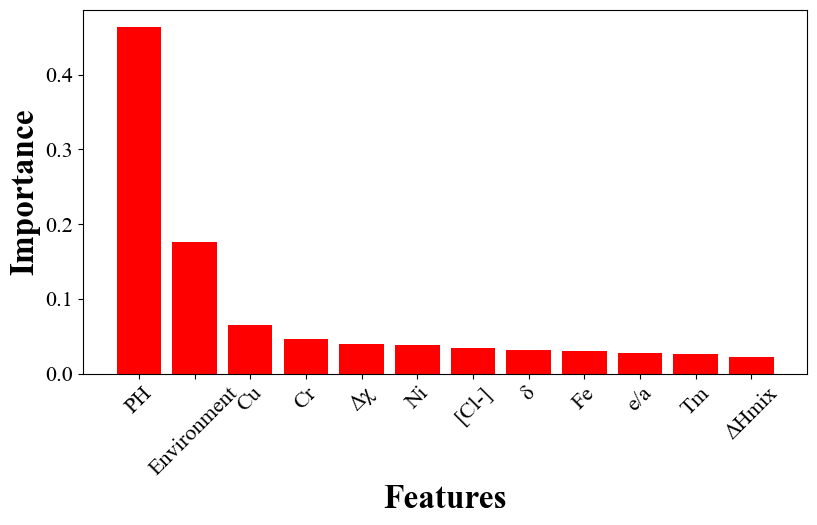

In [7]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(8, 5))
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.xlabel('Features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Importance',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.yticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.show()

# SHAP

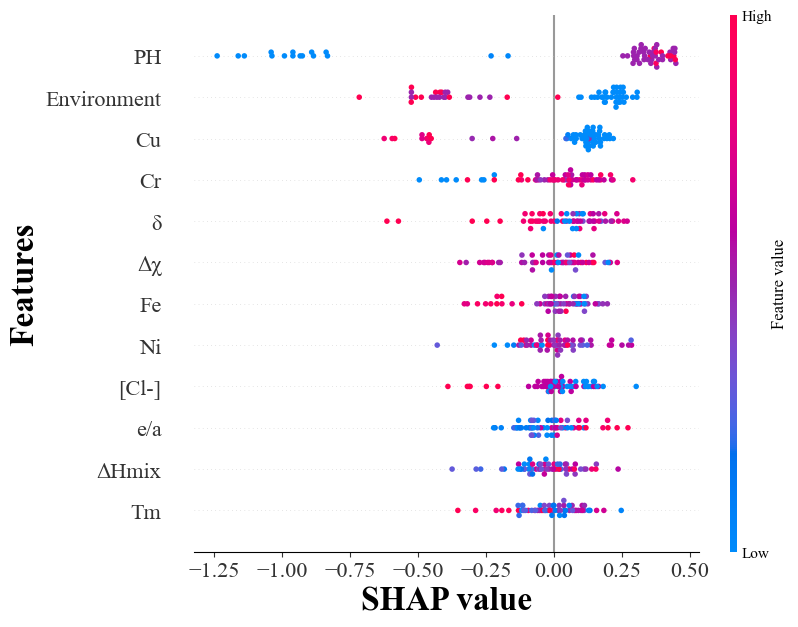

In [8]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# 创建SHAP解释器
explainer = shap.Explainer(loaded_model, X_train)

# 计算SHAP值
shap_values = explainer(X_test)

# 分析整体特征重要性
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.xlabel('SHAP value', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontsize=16)               
plt.yticks(fontsize=16)

plt.show()

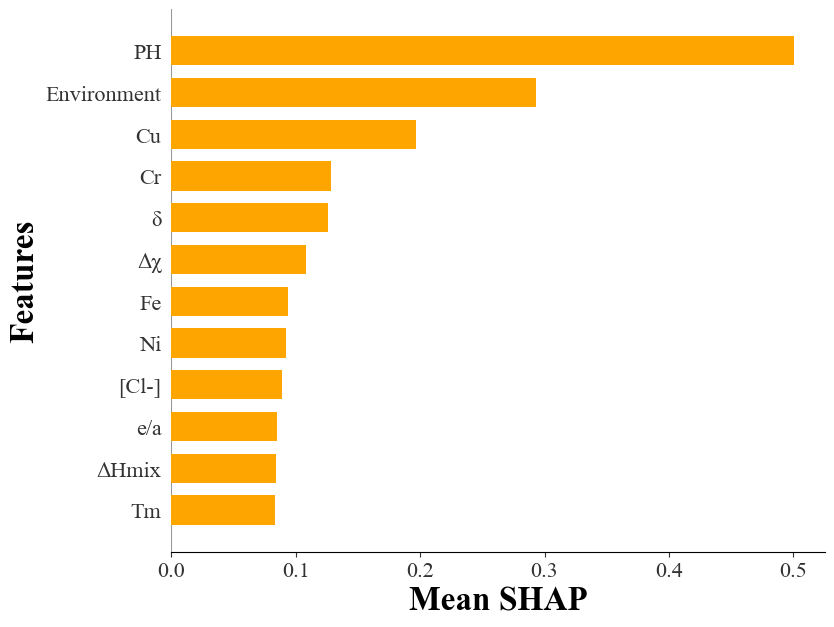

In [9]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar', color='orange', show=False)
plt.xlabel('Mean SHAP', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.yticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.show()

# 预测Ecorr

In [10]:
# 读取模型
loaded_model = load(open('D:\IPython\Corrosion-ML\saved_model2\梯度提升决策树\贝叶斯优化模型\BOGBDT_6.pkl', 'rb'))

In [11]:
# 读取数据
dataset = pd.read_csv('D:\IPython\Corrosion-ML./Corrosion_potential.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [12]:
# 去掉不必要的轴
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('δ', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('Δχ', axis=1)
dataset = dataset.drop('Fe', axis=1)
dataset = dataset.drop('Ni', axis=1)
dataset = dataset.drop('Cu', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
σVEC           0
ΔHmix          0
χbar           0
e/a            0
Tm             0
Co             0
Cr             0
Y              0
Ecorr          4
dtype: int64

In [13]:
# 去掉有空白的行
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   σVEC         315 non-null    float64
 4   ΔHmix        315 non-null    float64
 5   χbar         315 non-null    float64
 6   e/a          315 non-null    float64
 7   Tm           315 non-null    float64
 8   Co           315 non-null    float64
 9   Cr           315 non-null    float64
 10  Y            315 non-null    float64
 11  Ecorr        315 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 32.0 KB


In [14]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# 保存数据标准化工具
# dump(sc, open('D:\IPython\Corrosion-ML\Scarler\scaler.pkl', 'wb'))

# Feature importance

        feature  importance
1            PH    0.234075
9            Cr    0.136529
3          σVEC    0.094633
5          χbar    0.090664
2         [Cl-]    0.084788
0   Environment    0.072331
4         ΔHmix    0.065185
8            Co    0.063802
6           e/a    0.056818
10            Y    0.055466
7            Tm    0.045707


<Figure size 800x600 with 0 Axes>

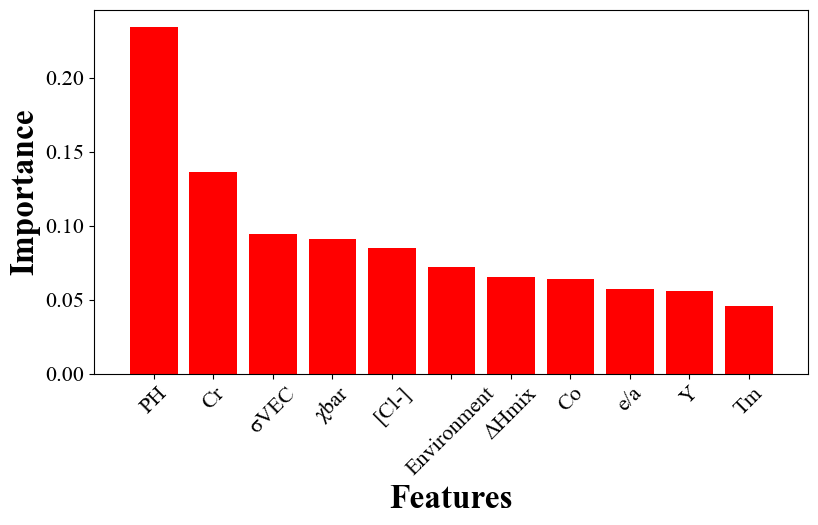

In [16]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(8, 5))
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.xlabel('Features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Importance',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.yticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.show()

# SHAP

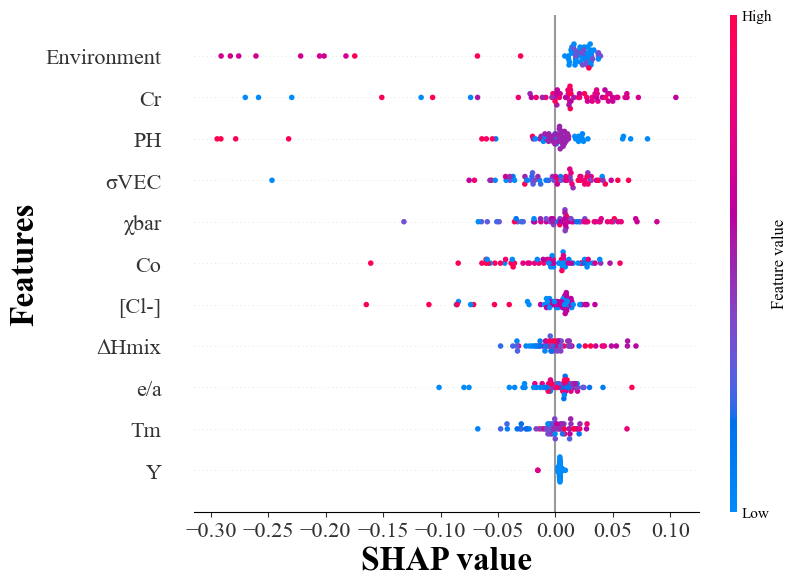

In [17]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# 创建SHAP解释器
explainer = shap.Explainer(loaded_model, X_train)

# 计算SHAP值
shap_values = explainer(X_test)

# 分析整体特征重要性
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.xlabel('SHAP value', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontsize=16)               
plt.yticks(fontsize=16)

plt.show()

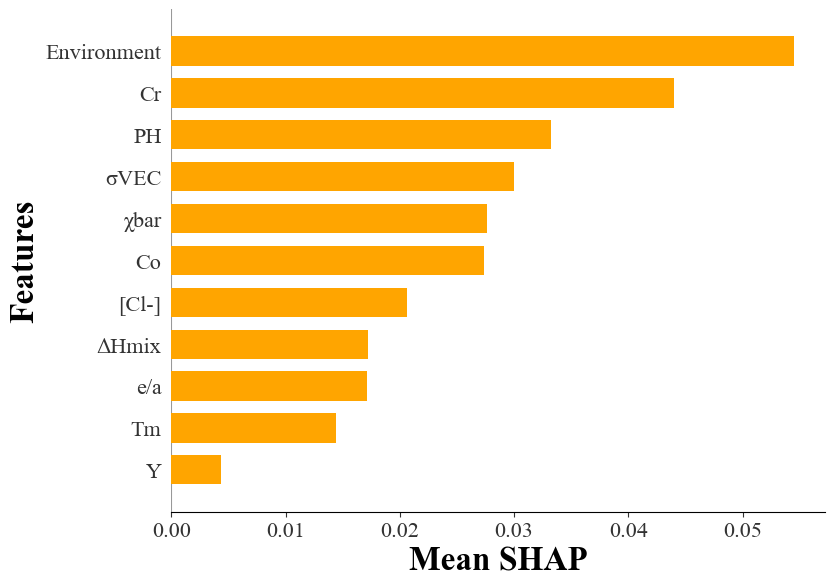

In [18]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar', color='orange', show=False)
plt.xlabel('Mean SHAP', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.yticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.show()